In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [64]:
df = pd.read_csv("./data/Fish.csv")

In [65]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [66]:
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [67]:
x_train, x_test, y_train, y_test = train_test_split(df["Length2"], df["Weight"], test_size = 0.25, random_state = 1)
x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

# 선형회귀(linear regression)

- 피쳐를 가장 잘 표현하는 하나의 직선을 학습하는 알고리즘
- 장점
    - 계수들에 대한 해석이 간단
    - 학습과 예측 속도가 빠름
    - 회귀식이 만들어져서 예측이 어떻게 됐는지 쉽게 이해할 수 있음
    
- 단점
    - 데이터가 선형적이지 않을 경우 모델이 데이터에 적합하지 않을 수 있음
    - 이상치에 민감

In [68]:
lr = LinearRegression()

In [69]:
# 선형회귀 모델 훈련
lr.fit(x_train, y_train)

LinearRegression()

In [70]:
# 50cm 농어에 대한 예측
lr.predict([[50]])

array([1164.37176795])

- 선형회귀 모델이 찾은 가장 적합한 직선은 lr 객체에 저장되어 있음

In [71]:
# 계수(coefficient), y절편
print(lr.coef_, lr.intercept_)

[35.66048008] -618.6522360150109


- 회귀식 : 35.66 * Length2 + (-618.65)
- coef_와 intercept_ 처럼 머신러닝이 찾은 값을 모델 파라미터(model parameter)라고 부름
- 즉, 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것
- 선형 회귀와 같이 모델 파라미터를 훈련하는 것을 **모델 기반 학습**이라고 하고 KNN과 같이 모델 파라미터가 없이 훈련 데이터를 저장하는 훈련 방법을 **사례 기반 학습**이라고 함

In [72]:
lr.coef_

array([35.66048008])

In [75]:
50 * lr.coef_ + lr.intercept_

array([1164.37176795])

In [76]:
lr.coef_.shape

(1,)

In [77]:
np.__version__

'1.24.3'

In [78]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [79]:
import sklearn
sklearn.__version__

'1.2.2'

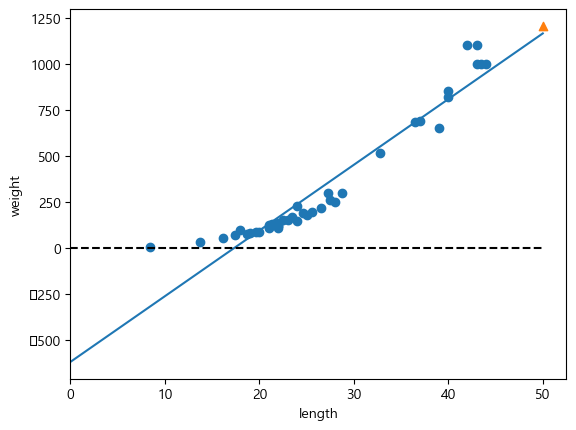

In [82]:
# 훈련 데이터와 회귀선 시각화
plt.figure()

plt.scatter(x_train, y_train)
plt.plot([0, 50], [lr.intercept_, 50*lr.coef_[0]+lr.intercept_])
plt.plot([0, 50], [0, 0], "k--")
plt.scatter(50, 1205, marker = "^")
plt.xlim(0)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 모델 평가

In [34]:
lr.score(x_test, y_test)

0.8801532075437282

In [35]:
pred = lr.predict(x_test)

In [36]:
mae = mean_absolute_error(y_test, pred)
mae

95.75440661725163

# 다항회귀

- 실제 농어의 무게는 일직선이라기보다는 왼쪽 위로 구부러진 곡선에 가깝기 때문에 직선보다는 곡선으로 예측하는 것이 더 적합
- 길이를 제곱한 항을 추가하여 2차 방정식의 그래프 형태로 학습

In [37]:
df["squared"] = df["Length2"] ** 2

In [38]:
df.head()

,Species,Length2,Weight,squared
72,Perch,8.4,5.9,70.56
73,Perch,13.7,32.0,187.69
74,Perch,15.0,40.0,225.00
75,Perch,16.2,51.5,262.44
76,Perch,17.4,70.0,302.76


In [45]:
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "squared"]], df["Weight"], test_size = 0.25, random_state = 2)

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(x_train, y_train)

LinearRegression()

In [48]:
lr.score(x_test, y_test)

0.9834512361883485

In [49]:
pred = lr.predict(x_test)

In [50]:
mae = mean_absolute_error(y_test, pred)
mae

36.998358822828166

In [51]:
lr.predict([[50, 2500]])

C:\Users\polar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1505.63742339])

In [52]:
print(lr.coef_, lr.intercept_)

[-14.66126862   0.88167266] 34.519192714402436


- 회귀식 : -14.66 * Length2 + 0.88 * squared + 34.51

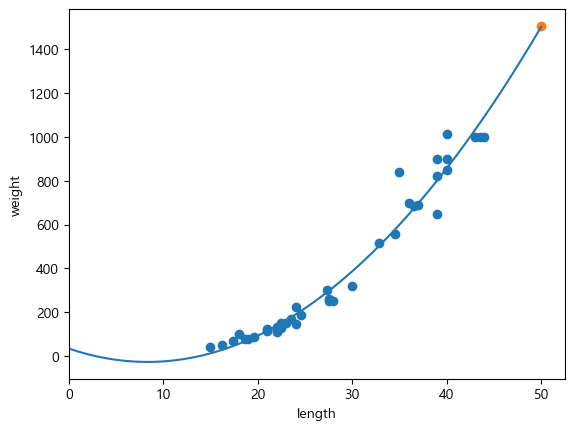

In [53]:
# 다항회귀 시각화
points = np.arange(51)

plt.scatter(x_train["Length2"], y_train)
plt.plot(points, -14.66 * points + (points**2*0.88 + 34.51))
plt.scatter(50, 1505.63)

plt.xlim(0)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()